# Data Import and Preprocessing

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import ast

drive.mount('/content/drive')

df_v = pd.read_csv('/content/drive/My Drive/Motor_Vehicle_Collisions.csv')

df_v.shape

Mounted at /content/drive


<ipython-input-1-7c27793c6f5b>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_v = pd.read_csv('/content/drive/My Drive/Motor_Vehicle_Collisions.csv')


(2078136, 29)

In [ ]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078136 entries, 0 to 2078135
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

## Preprocessing Location

In [ ]:
df_v['LOCATION'].isna().sum()

233804

In [ ]:
df_v.dropna(subset=['LOCATION'], inplace=True)

In [ ]:
df_v['LOCATION'].isna().sum()

0

In [ ]:
df_v['LOCATION'] = df_v['LOCATION'].apply(ast.literal_eval)

In [ ]:
df_v = df_v[df_v['LOCATION'] != (0.0, 0.0)]

In [ ]:
(df_v['LOCATION'] == (0.0, 0.0)).sum()

0

In [ ]:
df_v['LATITUDE'].dtype

dtype('float64')

In [ ]:
df_v['LONGITUDE'].dtype

dtype('float64')

In [ ]:
df_v.shape

(1839951, 29)

## Preprocessing Borough

In [ ]:
df_v['BOROUGH'].isna().sum()

448607

In [ ]:
df_v['BOROUGH'].unique()

array(['BROOKLYN', nan, 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [ ]:
nan_borough_df = df_v[df_v['BOROUGH'].isna()]

val_df = nan_borough_df.sample(n=5)
val_df['LOCATION']

887335     (40.75525, -73.998665)
354772     (40.826275, -73.85971)
823045     (40.744465, -73.77179)
735109     (40.760048, -73.92806)
2060452     (40.67101, -73.92239)
Name: LOCATION, dtype: object

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

boroughs = gpd.read_file('/content/drive/My Drive/borough_boundaries.geojson')

geometry = [Point(xy) for xy in zip(df_v['LONGITUDE'], df_v['LATITUDE'])]
geo_df = gpd.GeoDataFrame(df_v, geometry=geometry)

joined = gpd.sjoin(geo_df, boroughs, op='within')

df_v['BOROUGH NAME'] = joined['boro_name']

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-15-f8ecee3f8dec>:9: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(geo_df, boroughs, op='within')


In [ ]:
df_v.dropna(subset=['BOROUGH NAME'], inplace=True)

In [ ]:
df_v['BOROUGH NAME'].isna().sum()

0

In [ ]:
df_v['BOROUGH NAME'] = df_v['BOROUGH NAME'].str.upper()

In [ ]:
df_v[(df_v['BOROUGH'] != df_v['BOROUGH NAME']) & df_v['BOROUGH'].notna()][['BOROUGH','BOROUGH NAME','LOCATION']]

,BOROUGH,BOROUGH NAME,LOCATION
822,BRONX,MANHATTAN,"(40.875294, -73.9088)"
1751,BRONX,MANHATTAN,"(40.87484, -73.910835)"
1994,BRONX,MANHATTAN,"(40.87446, -73.91002)"
3189,QUEENS,BROOKLYN,"(40.68237, -73.864105)"
8771,BRONX,MANHATTAN,"(40.875088, -73.912415)"
...,...,...,...
2074115,BRONX,MANHATTAN,"(40.87574, -73.9115)"
2075984,BRONX,MANHATTAN,"(40.87618, -73.90943)"
2076527,BRONX,MANHATTAN,"(40.873894, -73.90917)"
2076914,QUEENS,BROOKLYN,"(40.706062, -73.91626)"


In [ ]:
df_v.loc[(df_v['BOROUGH'] != df_v['BOROUGH NAME']) & df_v['BOROUGH'].notna() & (df_v['BOROUGH NAME'] == 'MANHATTAN'), 'BOROUGH NAME'] = 'BRONX'

In [ ]:
df_v[(df_v['BOROUGH'] != df_v['BOROUGH NAME']) & df_v['BOROUGH'].notna()][['BOROUGH','BOROUGH NAME','LOCATION']]

,BOROUGH,BOROUGH NAME,LOCATION
3189,QUEENS,BROOKLYN,"(40.68237, -73.864105)"
9147,QUEENS,BROOKLYN,"(40.69757, -73.90758)"
12387,QUEENS,BROOKLYN,"(40.693703, -73.90505)"
13034,QUEENS,BROOKLYN,"(40.698677, -73.90954)"
15968,QUEENS,BROOKLYN,"(40.69285, -73.90355)"
...,...,...,...
2061208,QUEENS,BROOKLYN,"(40.684475, -73.866516)"
2065668,QUEENS,BROOKLYN,"(40.701485, -73.91143)"
2067929,QUEENS,BROOKLYN,"(40.698254, -73.90878)"
2068966,QUEENS,STATEN ISLAND,"(40.606747, -74.133)"


In [ ]:
df_v['BOROUGH NAME'].unique()

array(['BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [ ]:
df_v.shape

(1831425, 30)

## Preprocessing of Date and time

In [ ]:
df_v['CRASH TIME']

3           9:35
4           8:13
6          17:05
7           8:17
8          21:10
           ...  
2078131    16:00
2078132    15:04
2078133     8:10
2078134    16:50
2078135    16:16
Name: CRASH TIME, Length: 1831425, dtype: object

In [ ]:
df_v['CRASH DATE']

3          09/11/2021
4          12/14/2021
6          12/14/2021
7          12/14/2021
8          12/14/2021
              ...    
2078131    03/28/2024
2078132    04/02/2024
2078133    03/31/2024
2078134    03/28/2024
2078135    04/02/2024
Name: CRASH DATE, Length: 1831425, dtype: object

In [ ]:
df_v['DATETIME'] = pd.to_datetime(df_v['CRASH DATE'] + ' ' + df_v['CRASH TIME'], format='%m/%d/%Y %H:%M')

In [ ]:
df_v['DATETIME']

3         2021-09-11 09:35:00
4         2021-12-14 08:13:00
6         2021-12-14 17:05:00
7         2021-12-14 08:17:00
8         2021-12-14 21:10:00
                  ...        
2078131   2024-03-28 16:00:00
2078132   2024-04-02 15:04:00
2078133   2024-03-31 08:10:00
2078134   2024-03-28 16:50:00
2078135   2024-04-02 16:16:00
Name: DATETIME, Length: 1831425, dtype: datetime64[ns]

In [ ]:
df_v['YEAR'] = df_v['DATETIME'].dt.year
df_v['MONTH'] = df_v['DATETIME'].dt.month
df_v['DAY'] = df_v['DATETIME'].dt.day
df_v['HOUR'] = df_v['DATETIME'].dt.hour
df_v['DAY OF WEEK'] = df_v['DATETIME'].dt.dayofweek

In [ ]:
df_v.shape

(1831425, 36)

## Preprocessing of Contributing Factor

In [ ]:
df_v['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Unspecified', nan, 'Passing Too Closely', 'Driver Inexperience',
       'Passing or Lane Usage Improper', 'Turning Improperly',
       'Unsafe Speed', 'Reaction to Uninvolved Vehicle',
       'Steering Failure', 'Following Too Closely', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Oversized Vehicle',
       'Traffic Control Disregarded', 'Alcohol Involvement',
       'View Obstructed/Limited', 'Failure to Yield Right-of-Way',
       'Aggressive Driving/Road Rage', 'Pavement Slippery', 'Illnes',
       'Lost Consciousness', 'Brakes Defective', 'Backing Unsafely',
       'Passenger Distraction', 'Fell Asleep', 'Unsafe Lane Changing',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Obstruction/Debris', 'Tinted Windows', 'Animals Action',
       'Drugs (illegal)', 'Pavement Defective', 'Other Lighting Defects',
       'Outside Car Distraction', 'Driverless/Runaway Vehicle',
       'Tire Failure/Inadequate', 'Fatigued/Drowsy',
       'Headligh

In [ ]:
df_v['CONTRIBUTING FACTOR VEHICLE 1'] = df_v['CONTRIBUTING FACTOR VEHICLE 1'].replace({
    'Drugs (illegal)': 'Drugs',
    'Drugs (Illegal)': 'Drugs',
    '80': 'Unspecified',
    '1': 'Unspecified',
    'Cell Phone (hand-Held)': 'Cell Phone',
    'Cell Phone (hand-held)': 'Cell Phone',
    'Cell Phone (hands-free)': 'Cell Phone',
    'Illnes': 'Illness'
})

df_v['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)


In [ ]:
df_v['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Unspecified', 'Passing Too Closely', 'Driver Inexperience',
       'Passing or Lane Usage Improper', 'Turning Improperly',
       'Unsafe Speed', 'Reaction to Uninvolved Vehicle',
       'Steering Failure', 'Following Too Closely', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Oversized Vehicle',
       'Traffic Control Disregarded', 'Alcohol Involvement',
       'View Obstructed/Limited', 'Failure to Yield Right-of-Way',
       'Aggressive Driving/Road Rage', 'Pavement Slippery', 'Illness',
       'Lost Consciousness', 'Brakes Defective', 'Backing Unsafely',
       'Passenger Distraction', 'Fell Asleep', 'Unsafe Lane Changing',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Obstruction/Debris', 'Tinted Windows', 'Animals Action', 'Drugs',
       'Pavement Defective', 'Other Lighting Defects',
       'Outside Car Distraction', 'Driverless/Runaway Vehicle',
       'Tire Failure/Inadequate', 'Fatigued/Drowsy',
       'Headlights Defective',

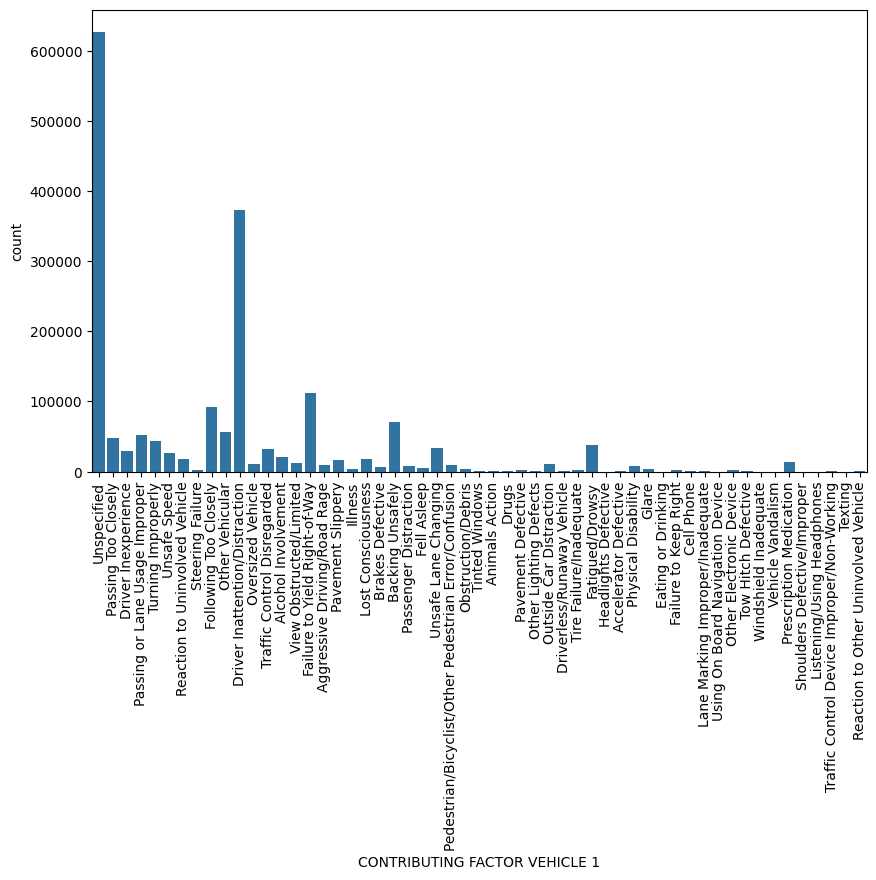

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'column_name' is the name of your column
plt.figure(figsize=(10,6))
sns.countplot(data=df_v, x='CONTRIBUTING FACTOR VEHICLE 1')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

## Preprocessing of Address

In [ ]:
(df_v['OFF STREET NAME'].isna() & df_v['CROSS STREET NAME'].isna() & df_v['ON STREET NAME'].isna()).sum()

61275

In [ ]:
df_v.shape[0]

1831425

In [ ]:
df_v['STREET NAME'] = df_v['ON STREET NAME'].fillna(df_v['CROSS STREET NAME']).fillna(df_v['OFF STREET NAME'])

In [ ]:
df_v['STREET NAME'].isna().sum()

61275

In [ ]:
df_v.dropna(subset=['STREET NAME'], inplace=True)

In [ ]:
df_v.shape[0]

1770150

## Preprocessing of Person Injured

In [ ]:
df_v['NUMBER OF PERSONS INJURED'] = df_v['NUMBER OF PERSONS INJURED'].fillna(0)
df_v['NUMBER OF PERSONS KILLED'] = df_v['NUMBER OF PERSONS KILLED'].fillna(0)
df_v['NUMBER OF PERSONS INJURED'] = df_v['NUMBER OF PERSONS INJURED'].astype('int64')
df_v['NUMBER OF PERSONS KILLED'] = df_v['NUMBER OF PERSONS KILLED'].astype('int64')

In [ ]:
df_v['PEOPLE INJURED'] = df_v['NUMBER OF PERSONS INJURED'] + df_v['NUMBER OF PEDESTRIANS INJURED'] + df_v['NUMBER OF CYCLIST INJURED'] + df_v['NUMBER OF MOTORIST INJURED']

In [ ]:
df_v['PEOPLE KILLED'] = df_v['NUMBER OF PERSONS KILLED'] + df_v['NUMBER OF PEDESTRIANS KILLED'] + df_v['NUMBER OF CYCLIST KILLED'] + df_v['NUMBER OF MOTORIST KILLED']

In [ ]:
df_v["PEOPLE INJURED"].value_counts()

PEOPLE INJURED
0     1358823
2      316615
4       57732
6       18760
8        6885
1        6367
10       2605
12       1086
14        460
3         255
16        202
18         98
20         77
22         40
5          29
24         29
26         24
30         13
7           7
28          7
34          6
36          6
32          5
44          3
38          2
48          2
9           2
40          2
54          1
19          1
64          1
86          1
42          1
46          1
68          1
50          1
Name: count, dtype: int64

In [ ]:
df_v["PEOPLE KILLED"].value_counts()

PEOPLE KILLED
0     1767664
2        2360
4          55
1          54
6          12
8           3
16          1
10          1
Name: count, dtype: int64

In [ ]:
df_v["PEOPLE AFFECTED"] = df_v['PEOPLE INJURED'] + df_v["PEOPLE KILLED"]

## Adding Weather Data

In [ ]:
files = ['NYC_Weather_1.csv', 'NYC_Weather_2.csv', 'NYC_Weather_3.csv', 'NYC_Weather_4.csv', 'NYC_Weather_5.csv', 'NYC_Weather_6.csv','NYC_Weather_7.csv', 'NYC_Weather_8.csv', 'NYC_Weather_9.csv', 'NYC_Weather_10.csv', 'NYC_Weather_11.csv', 'NYC_Weather_12.csv', 'NYC_Weather_13.csv', 'NYC_Weather_14.csv', 'NYC_Weather_15.csv']

# Create an empty DataFrame
dfs = []

for file in files:
    temp_df = pd.read_csv('/content/drive/My Drive/'+file)
    dfs.append(temp_df)

df_w = pd.concat(dfs,ignore_index=True)
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4494 non-null   object 
 1   datetime          4494 non-null   object 
 2   tempmax           4494 non-null   float64
 3   tempmin           4494 non-null   float64
 4   temp              4494 non-null   float64
 5   feelslikemax      4494 non-null   float64
 6   feelslikemin      4494 non-null   float64
 7   feelslike         4494 non-null   float64
 8   dew               4494 non-null   float64
 9   humidity          4494 non-null   float64
 10  precip            4494 non-null   float64
 11  precipprob        4494 non-null   int64  
 12  precipcover       4494 non-null   float64
 13  preciptype        2382 non-null   object 
 14  snow              4494 non-null   float64
 15  snowdepth         4494 non-null   float64
 16  windgust          4339 non-null   float64


In [ ]:
# df_w['description'].unique()
# precip, precipcover, snow, snowdepth, dew, windspeed, winddir, visibility, cloudcover, humidity

In [ ]:
# df_v['CRASH DATE']
df_v['CRASH DATE'] = pd.to_datetime(df_v['CRASH DATE'], format='%m/%d/%Y')
# df_v['CRASH TIME'] = pd.to_datetime(df_v['CRASH TIME'])
df_v['CRASH DATE'].min()

Timestamp('2012-07-01 00:00:00')

In [ ]:
df_w['datetime'] = pd.to_datetime(df_w['datetime'], format='%Y-%m-%d')
df_w['datetime']

0      2021-01-01
1      2021-01-02
2      2021-01-03
3      2021-01-04
4      2021-01-05
          ...    
4489   2012-12-27
4490   2012-12-28
4491   2012-12-29
4492   2012-12-30
4493   2012-12-31
Name: datetime, Length: 4494, dtype: datetime64[ns]

In [ ]:
columns_to_add = ['precip', 'precipcover', 'snow', 'snowdepth', 'dew', 'windspeed', 'winddir', 'visibility', 'cloudcover', 'humidity']

# Merge the dataframes on the date columns
df_v = pd.merge(df_v, df_w[columns_to_add + ['datetime']], left_on='CRASH DATE', right_on='datetime', how='left')

# Drop the extra datetime column
df_v = df_v.drop(columns=['datetime'])

In [ ]:
df_v.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'BOROUGH NAME', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'DAY OF WEEK', 'STREET NAME', 'PEOPLE INJURED', 'PEOPLE KILLED',
       'PEOPLE AFFECTED', 'precip', 'precipcover', 'snow', 'snowdepth', 'dew',
       'windspeed', 'wind

## Dropping Useless Columns

In [ ]:
df = df_v.drop(columns=['ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME','OFF STREET NAME','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5','CRASH DATE','CRASH TIME','BOROUGH','LOCATION','PEOPLE INJURED','PEOPLE KILLED','DATETIME'])

In [ ]:
df_vis = df_v.drop(columns=['ZIP CODE', 'ON STREET NAME', 'CROSS STREET NAME','OFF STREET NAME',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5','BOROUGH'])

In [ ]:
df.columns = df.columns.str.upper()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770150 entries, 0 to 1770149
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   LATITUDE         float64
 1   LONGITUDE        float64
 2   BOROUGH NAME     object 
 3   YEAR             int32  
 4   MONTH            int32  
 5   DAY              int32  
 6   HOUR             int32  
 7   DAY OF WEEK      int32  
 8   STREET NAME      object 
 9   PEOPLE AFFECTED  int64  
 10  PRECIP           float64
 11  PRECIPCOVER      float64
 12  SNOW             float64
 13  SNOWDEPTH        float64
 14  DEW              float64
 15  WINDSPEED        float64
 16  WINDDIR          float64
 17  VISIBILITY       float64
 18  CLOUDCOVER       float64
 19  HUMIDITY         float64
dtypes: float64(12), int32(5), int64(1), object(2)
memory usage: 236.3+ MB


In [ ]:
# df_vis.columns = df_vis.columns.str.upper()

# df_vis['CRASH TIME'] = pd.to_datetime(df_vis['CRASH TIME'], format='%H:%M').dt.time
# df_vis['CRASH DATE']
# df_vis.info()
# df_vis.to_csv('crash_data_vis.csv', index=False)

In [ ]:
(2078136 - df.shape[0])/2078136 * 100

14.820300500063519

In [ ]:
df['PEOPLE AFFECTED'].value_counts()

PEOPLE AFFECTED
0     1356938
2      318107
4       57915
6       18843
8        6925
1        6412
10       2619
12       1095
14        466
3         259
16        204
18        100
20         78
22         41
24         30
5          29
26         24
30         11
7           8
28          7
34          6
36          6
32          6
40          3
44          3
38          3
48          2
9           2
19          1
64          1
56          1
86          1
42          1
46          1
68          1
50          1
Name: count, dtype: int64

In [ ]:
df['STREET NAME'].value_counts()

STREET NAME
BROADWAY                                    15942
ATLANTIC AVENUE                             14170
BELT PARKWAY                                11941
3 AVENUE                                    11554
NORTHERN BOULEVARD                          10259
                                            ...  
214-27    NORTHERN BOULEVARD                    1
215-05    43 AVENUE                             1
6332      AVENUE N                              1
349       GATES AVENUE                          1
277       WEST 127 STREET                       1
Name: count, Length: 220473, dtype: int64

# Data Encoding

In [ ]:
from gensim.models import Word2Vec

df['street_name_split'] = df['STREET NAME'].apply(lambda x: x.split())

model = Word2Vec(df['street_name_split'], min_count=1, vector_size=50)

def encode_street_name(street_name):
    encoding = []
    for word in street_name:
        if word in model.wv:
            encoding.append(model.wv[word])
    if encoding:
        return np.mean(encoding, axis=0)
    else:
        return np.zeros(model.vector_size)

df['STREET NAME ENC'] = df['street_name_split'].apply(encode_street_name)
df['STREET NAME ENC']

0          [-0.08331659, 0.010172998, -0.07827077, 0.0853...
1          [0.37576267, 0.60969746, 0.16040915, 0.7370216...
2          [-0.015769312, -0.03130571, 1.6832036, 0.74997...
3          [0.18119721, 0.1831218, -0.035341185, 0.350053...
4          [0.13678937, -0.07562864, 0.18741143, 0.629667...
                                 ...                        
1770145    [1.0577158, 1.3144795, -1.0940595, 0.24807602,...
1770146    [0.07354012, 0.084966846, 0.25270295, 0.698440...
1770147    [1.6582481, 0.65327746, 0.4665114, 0.848159, 0...
1770148    [0.26681578, 1.6429359, -0.18619119, -0.560279...
1770149    [0.21551578, 1.4826683, -0.6595798, 1.0696551,...
Name: STREET NAME ENC, Length: 1770150, dtype: object

In [ ]:
df=df.drop(columns=['STREET NAME','street_name_split','STREET NAME ENC'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770150 entries, 0 to 1770149
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   LATITUDE         float64
 1   LONGITUDE        float64
 2   BOROUGH NAME     object 
 3   YEAR             int32  
 4   MONTH            int32  
 5   DAY              int32  
 6   HOUR             int32  
 7   DAY OF WEEK      int32  
 8   PEOPLE AFFECTED  int64  
 9   PRECIP           float64
 10  PRECIPCOVER      float64
 11  SNOW             float64
 12  SNOWDEPTH        float64
 13  DEW              float64
 14  WINDSPEED        float64
 15  WINDDIR          float64
 16  VISIBILITY       float64
 17  CLOUDCOVER       float64
 18  HUMIDITY         float64
dtypes: float64(12), int32(5), int64(1), object(1)
memory usage: 222.8+ MB


In [ ]:
df = pd.get_dummies(df, columns=['BOROUGH NAME'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770150 entries, 0 to 1770149
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   LATITUDE                    float64
 1   LONGITUDE                   float64
 2   YEAR                        int32  
 3   MONTH                       int32  
 4   DAY                         int32  
 5   HOUR                        int32  
 6   DAY OF WEEK                 int32  
 7   PEOPLE AFFECTED             int64  
 8   PRECIP                      float64
 9   PRECIPCOVER                 float64
 10  SNOW                        float64
 11  SNOWDEPTH                   float64
 12  DEW                         float64
 13  WINDSPEED                   float64
 14  WINDDIR                     float64
 15  VISIBILITY                  float64
 16  CLOUDCOVER                  float64
 17  HUMIDITY                    float64
 18  BOROUGH NAME_BRONX          bool   
 19  BOROUGH NAME_BROOKLYN

In [ ]:
import pandas as pd

# bins = [-1, 2, 5, 8, 11, float('inf')]
# labels = ['0-2', '3-5', '6-8', '9-11', '12+']
bins = [-1,0,float('inf')]
labels = ['No', 'Yes']
df['AFFECTED'] = pd.cut(df['PEOPLE AFFECTED'], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=['AFFECTED'])

df = df.drop(columns=['AFFECTED_No','PEOPLE AFFECTED'])
df = df.rename(columns={'AFFECTED_Yes': 'IS_AFFECTED'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770150 entries, 0 to 1770149
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   LATITUDE                    float64
 1   LONGITUDE                   float64
 2   YEAR                        int32  
 3   MONTH                       int32  
 4   DAY                         int32  
 5   HOUR                        int32  
 6   DAY OF WEEK                 int32  
 7   PRECIP                      float64
 8   PRECIPCOVER                 float64
 9   SNOW                        float64
 10  SNOWDEPTH                   float64
 11  DEW                         float64
 12  WINDSPEED                   float64
 13  WINDDIR                     float64
 14  VISIBILITY                  float64
 15  CLOUDCOVER                  float64
 16  HUMIDITY                    float64
 17  BOROUGH NAME_BRONX          bool   
 18  BOROUGH NAME_BROOKLYN       bool   
 19  BOROUGH NAME_MANHATTA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770150 entries, 0 to 1770149
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   LATITUDE                    float64
 1   LONGITUDE                   float64
 2   YEAR                        int32  
 3   MONTH                       int32  
 4   DAY                         int32  
 5   HOUR                        int32  
 6   DAY OF WEEK                 int32  
 7   PRECIP                      float64
 8   PRECIPCOVER                 float64
 9   SNOW                        float64
 10  SNOWDEPTH                   float64
 11  DEW                         float64
 12  WINDSPEED                   float64
 13  WINDDIR                     float64
 14  VISIBILITY                  float64
 15  CLOUDCOVER                  float64
 16  HUMIDITY                    float64
 17  BOROUGH NAME_BRONX          bool   
 18  BOROUGH NAME_BROOKLYN       bool   
 19  BOROUGH NAME_MANHATTA

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=15)
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

print(featureScores.nlargest(20, 'Score'))

                       Feature     Score
18       BOROUGH NAME_BROOKLYN  0.063882
20         BOROUGH NAME_QUEENS  0.053639
6                  DAY OF WEEK  0.042626
2                         YEAR  0.041081
14                  VISIBILITY  0.039685
19      BOROUGH NAME_MANHATTAN  0.038104
3                        MONTH  0.022624
0                     LATITUDE  0.022204
1                    LONGITUDE  0.019449
17          BOROUGH NAME_BRONX  0.017413
5                         HOUR  0.016428
13                     WINDDIR  0.008684
4                          DAY  0.008054
7                       PRECIP  0.005848
8                  PRECIPCOVER  0.005126
15                  CLOUDCOVER  0.004029
12                   WINDSPEED  0.003802
21  BOROUGH NAME_STATEN ISLAND  0.003678
16                    HUMIDITY  0.002888
11                         DEW  0.002868


In [ ]:
feat = list(featureScores.nlargest(16, 'Score')['Feature'])
X = df[feat]
for c in X.columns:
  if X[c].dtype == bool:
    X[c] = X[c].astype('int')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770150 entries, 0 to 1770149
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   BOROUGH NAME_BROOKLYN   int64  
 1   BOROUGH NAME_QUEENS     int64  
 2   DAY OF WEEK             int32  
 3   YEAR                    int32  
 4   VISIBILITY              float64
 5   BOROUGH NAME_MANHATTAN  int64  
 6   MONTH                   int32  
 7   LATITUDE                float64
 8   LONGITUDE               float64
 9   BOROUGH NAME_BRONX      int64  
 10  HOUR                    int32  
 11  WINDDIR                 float64
 12  DAY                     int32  
 13  PRECIP                  float64
 14  PRECIPCOVER             float64
 15  CLOUDCOVER              float64
dtypes: float64(7), int32(5), int64(4)
memory usage: 182.3 MB


<ipython-input-87-c3e7b307cb81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = X[c].astype('int')
<ipython-input-87-c3e7b307cb81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = X[c].astype('int')
<ipython-input-87-c3e7b307cb81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [ ]:
df['IS_AFFECTED'].value_counts()

IS_AFFECTED
False    1356938
True      413212
Name: count, dtype: int64

# Model Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='auc')

# kfold = KFold(n_splits=5)

# xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold)

# Print cross-validation scores
# print("XGBoost Cross-Validation Scores:", xgb_scores)

# Fit the models
# xgb_model.fit(X_train, y_train)


In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: >

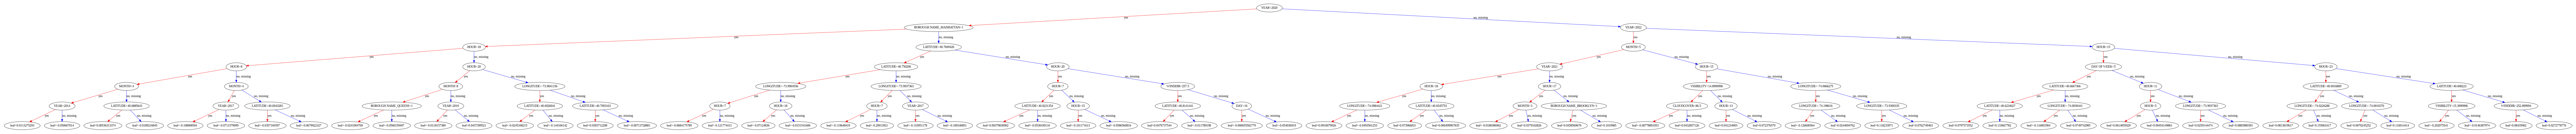

In [ ]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 100,180

plot_tree(xgb_model, num_trees=2)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# import tensorflow.keras.backend as K
# from keras.optimizers import Adam


# adam = Adam(learning_rate=0.001)
# input_dim = X.shape[1]
# K.clear_session()
# model = Sequential()

# model.add(Dense(32, input_dim=input_dim, activation='relu'))

# model.add(Dense(16, activation='relu'))

# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# model.fit(X_train,y_train,epochs=100, batch_size=1024)

In [ ]:
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
# from keras.optimizers import Adam
# from sklearn.model_selection import train_test_split, cross_val_score, KFold

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# adam = Adam(learning_rate=0.01)
# X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))

# input_dim = X.shape[1]

# lstm = Sequential()

# lstm.add(LSTM(64, input_shape=(None, input_dim), return_sequences=True))

# lstm.add(Dropout(0.5))
# lstm.add(LSTM(32, return_sequences=True))
# lstm.add(LSTM(16, return_sequences=True))
# lstm.add(Dropout(0.5))
# lstm.add(LSTM(8, return_sequences=True))
# lstm.add(LSTM(4))
# lstm.add(Dense(1, activation='sigmoid'))

# lstm.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


In [ ]:
# lstm.fit(X_train,y_train,epochs=100, batch_size=1024)

In [ ]:
# lstm.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
